# Data Preprocessing

### step-1: Import Necessary Libraries

In [1]:
# Libraries required 
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
from sklearn import preprocessing 
from sklearn import model_selection 
from sklearn import metrics 
from sklearn import linear_model 
from sklearn import ensemble 
from sklearn import tree 
from sklearn import svm 
import xgboost
import warnings
warnings.filterwarnings('ignore')

### step-2: Importing the Dataset

In [2]:
data=pd.read_csv("C:/Users/rsana/Machine Learning Approach For Predicting The Rainfall/WHETHERAUS.csv")

### step-3: Analyse the data

In [3]:
data.head()

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  01-12-2008   Albury     13.4     22.9       0.6          NaN       NaN   
1  02-12-2008   Albury      7.4     25.1       0.0          NaN       NaN   
2  03-12-2008   Albury     12.9     25.7       0.0          NaN       NaN   
3  04-12-2008   Albury      9.2     28.0       0.0          NaN       NaN   
4  05-12-2008   Albury     17.5     32.3       1.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   
3          NE           24.0         SE  ...        45.0         16.0   
4           W           41.0        ENE  ...        82.0         33.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   
3       1017.6       1012.8       NaN       NaN     18.1     26.5         No   
4       1010.8       1006.0       7.0       8.0     17.8     29.7         No   

   RainTomorrow  
0            No  
1            No  
2            No  
3            No  
4            No  

[5 rows x 23 columns]

In [4]:
data.describe()

MinTemp        MaxTemp       Rainfall   Evaporation  \
count  141556.000000  141871.000000  140787.000000  81350.000000   
mean       12.186400      23.226784       2.349974      5.469824   
std         6.403283       7.117618       8.465173      4.188537   
min        -8.500000      -4.800000       0.000000      0.000000   
25%         7.600000      17.900000       0.000000      2.600000   
50%        12.000000      22.600000       0.000000      4.800000   
75%        16.800000      28.200000       0.800000      7.400000   
max        33.900000      48.100000     371.000000    145.000000   

           Sunshine  WindGustSpeed   WindSpeed9am   WindSpeed3pm  \
count  74377.000000  132923.000000  140845.000000  139563.000000   
mean       7.624853      39.984292      14.001988      18.637576   
std        3.781525      13.588801       8.893337       8.803345   
min        0.000000       6.000000       0.000000       0.000000   
25%        4.900000      31.000000       7.000000      13.000000   
50%        8.500000      39.000000      13.000000      19.000000   
75%       10.600000      48.000000      19.000000      24.000000   
max       14.500000     135.000000     130.000000      87.000000   

         Humidity9am    Humidity3pm    Pressure9am    Pressure3pm  \
count  140419.000000  138583.000000  128179.000000  128212.000000   
mean       68.843810      51.482606    1017.653758    1015.258204   
std        19.051293      20.797772       7.105476       7.036677   
min         0.000000       0.000000     980.500000     977.100000   
25%        57.000000      37.000000    1012.900000    1010.400000   
50%        70.000000      52.000000    1017.600000    1015.200000   
75%        83.000000      66.000000    1022.400000    1020.000000   
max       100.000000     100.000000    1041.000000    1039.600000   

           Cloud9am      Cloud3pm        Temp9am        Temp3pm  
count  88536.000000  85099.000000  141289.000000  139467.000000  
mean       4.437189      4.503167      16.987509      21.687235  
std        2.887016      2.720633       6.492838       6.937594  
min        0.000000      0.000000      -7.200000      -5.400000  
25%        1.000000      2.000000      12.300000      16.600000  
50%        5.000000      5.000000      16.700000      21.100000  
75%        7.000000      7.000000      21.600000      26.400000  
max        9.000000      9.000000      40.200000      46.700000

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

### step-4: Handling Missing Values

In [6]:
data.isnull().sum()

Date                 0
Location             0
MinTemp            637
MaxTemp            322
Rainfall          1406
Evaporation      60843
Sunshine         67816
WindGustDir       9330
WindGustSpeed     9270
WindDir9am       10013
WindDir3pm        3778
WindSpeed9am      1348
WindSpeed3pm      2630
Humidity9am       1774
Humidity3pm       3610
Pressure9am      14014
Pressure3pm      13981
Cloud9am         53657
Cloud3pm         57094
Temp9am            904
Temp3pm           2726
RainToday         1406
RainTomorrow         0
dtype: int64

### Dealing with missing values

<Axes: >

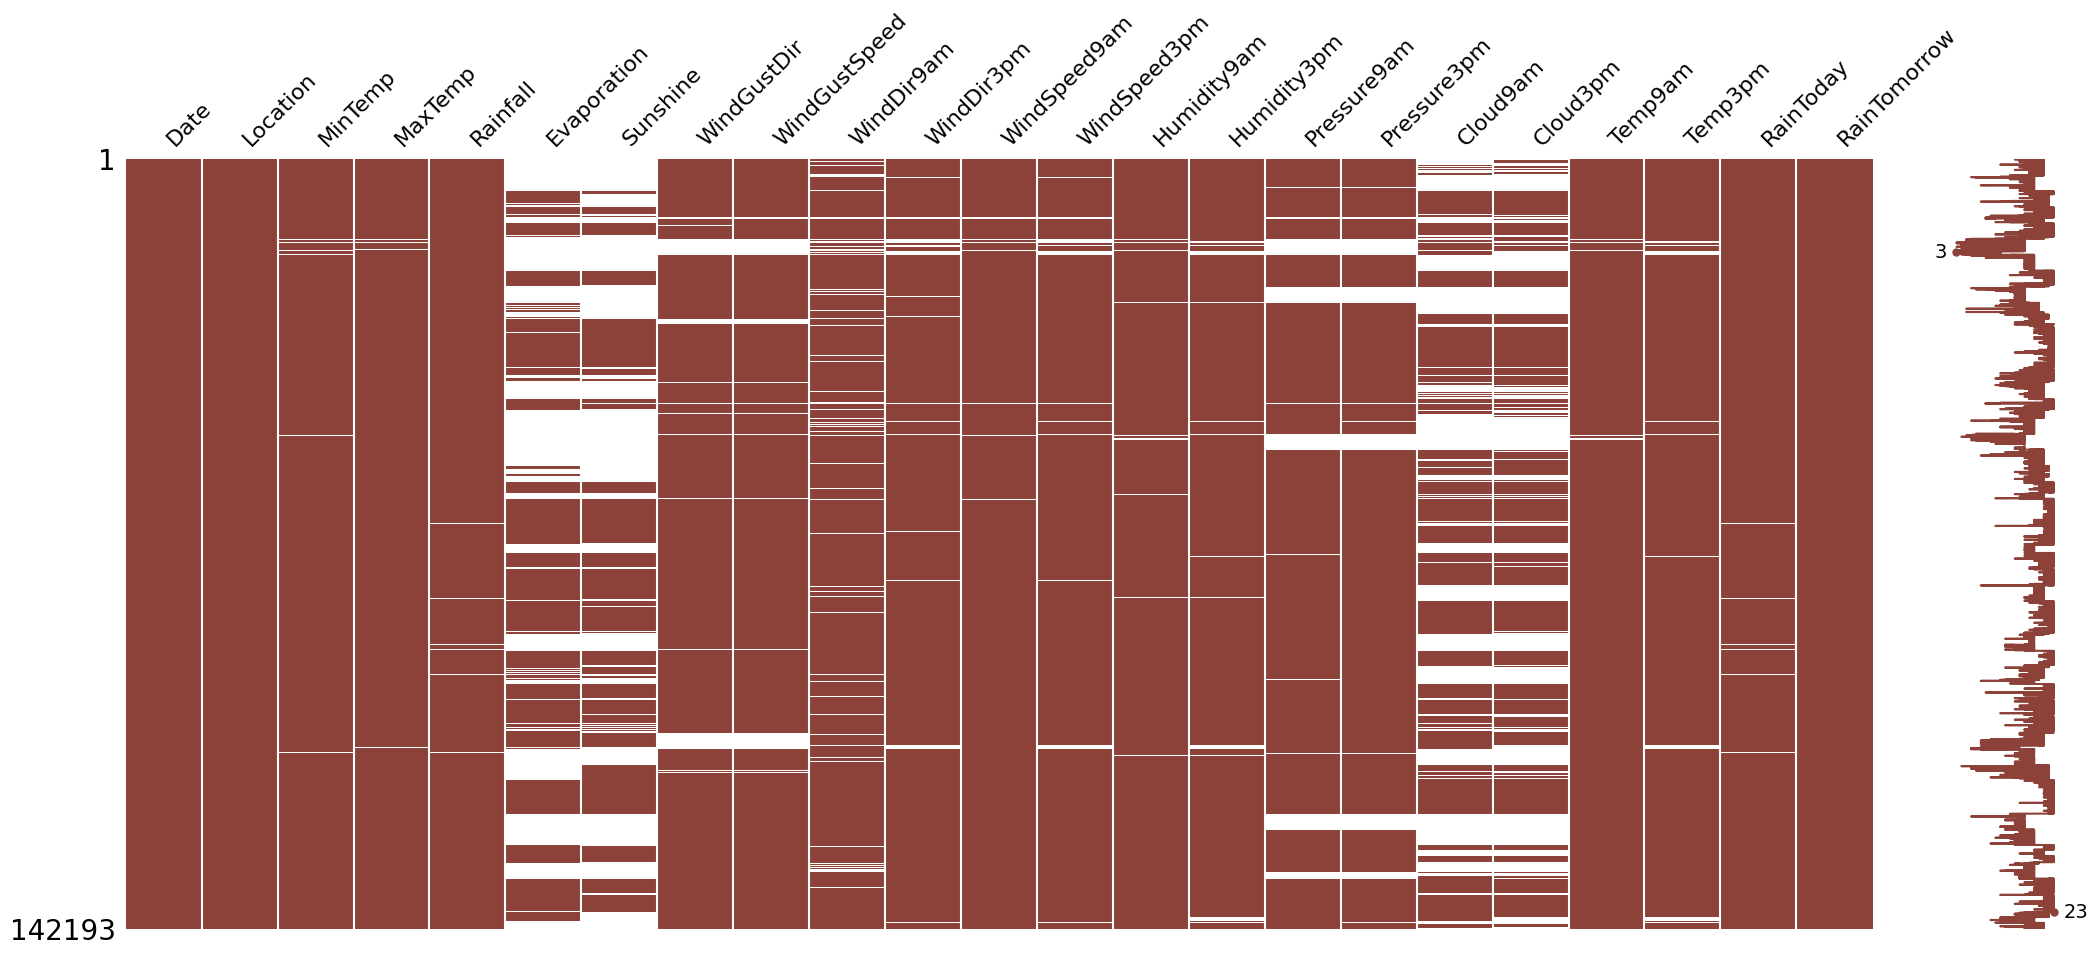

In [7]:
import missingno as msno 
msno.matrix(data,color=(0.55, 0.255, 0.225), fontsize=16)

### Filling NaN values with mean, median and mode using fillna() method.

In [8]:
data_cat = data[['RainToday','WindGustDir','WindDir9am','WindDir3pm']]
data.drop(columns=['Evaporation','Sunshine','Cloud9am','Cloud3pm'],axis=1,inplace=True)
data.drop(columns=['RainToday','WindGustDir','WindDir9am','WindDir3pm'],axis=1,inplace=True)

In [9]:
# filling the missing data of numeric variables with mean 
data['MinTemp'].fillna(data['MinTemp'].mean(),inplace=True)
data['MaxTemp'].fillna(data['MaxTemp'].mean(),inplace=True)
data['Rainfall'].fillna(data['Rainfall'].mean(),inplace=True)
data['WindGustSpeed'].fillna(data['WindGustSpeed'].mean(),inplace=True)
data['WindSpeed9am'].fillna(data['WindSpeed9am'].mean(),inplace=True)
data['WindSpeed3pm'].fillna(data['WindSpeed3pm'].mean(),inplace=True)
data['Humidity9am'].fillna(data['Humidity9am'].mean(),inplace=True)
data['Humidity3pm'].fillna(data['Humidity3pm'].mean(),inplace=True) 
data['Pressure9am'].fillna(data['Pressure9am'].mean(),inplace=True)
data['Pressure3pm'].fillna(data['Pressure3pm'].mean(),inplace=True)
data['Temp9am'].fillna(data['Temp9am'].mean(),inplace=True)
data['Temp3pm'].fillna(data['Temp3pm'].mean(),inplace=True)

In [10]:
#Loading the names of categorical columns 
cat_names = data_cat.columns

In [11]:
# intializing the simple imputer for missing categorical values 
import numpy as np 
from sklearn.impute import SimpleImputer 
imp_mode = SimpleImputer(missing_values=np.nan, strategy='most_frequent')

In [12]:
# fitting and transforming the missing data 
data_cat = imp_mode.fit_transform(data_cat)

In [13]:
# converting array to dataframe 
data_cat = pd.DataFrame(data_cat,columns=cat_names)

In [14]:
# concatinating the categorical and numeric data 
data = pd.concat([data,data_cat],axis=1)

### step-5: Data Visualisation

In [15]:
data.corr(numeric_only=True)

MinTemp   MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
MinTemp        1.000000  0.733919  0.103314       0.173331      0.174946   
MaxTemp        0.733919  1.000000 -0.074202       0.066329      0.014586   
Rainfall       0.103314 -0.074202  1.000000       0.127250      0.085977   
WindGustSpeed  0.173331  0.066329  0.127250       1.000000      0.577864   
WindSpeed9am   0.174946  0.014586  0.085977       0.577864      1.000000   
WindSpeed3pm   0.174187  0.050381  0.056762       0.658377      0.513079   
Humidity9am   -0.232372 -0.499777  0.221392      -0.209272     -0.269027   
Humidity3pm    0.005913 -0.499725  0.249609      -0.025822     -0.030991   
Pressure9am   -0.424357 -0.309093 -0.159676      -0.426600     -0.215178   
Pressure3pm   -0.434034 -0.397422 -0.120366      -0.384642     -0.165050   
Temp9am        0.897999  0.880087  0.011384       0.146756      0.128769   
Temp3pm        0.699828  0.969735 -0.077553       0.032274      0.005026   

               WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
MinTemp            0.174187    -0.232372     0.005913    -0.424357   
MaxTemp            0.050381    -0.499777    -0.499725    -0.309093   
Rainfall           0.056762     0.221392     0.249609    -0.159676   
WindGustSpeed      0.658377    -0.209272    -0.025822    -0.426600   
WindSpeed9am       0.513079    -0.269027    -0.030991    -0.215178   
WindSpeed3pm       1.000000    -0.144270     0.015789    -0.277495   
Humidity9am       -0.144270     1.000000     0.659852     0.131601   
Humidity3pm        0.015789     0.659852     1.000000    -0.025769   
Pressure9am       -0.277495     0.131601    -0.025769     1.000000   
Pressure3pm       -0.239743     0.176168     0.048566     0.959878   
Temp9am            0.162144    -0.471137    -0.217593    -0.397763   
Temp3pm            0.028443    -0.492430    -0.555777    -0.266308   

               Pressure3pm   Temp9am   Temp3pm  
MinTemp          -0.434034  0.897999  0.699828  
MaxTemp          -0.397422  0.880087  0.969735  
Rainfall         -0.120366  0.011384 -0.077553  
WindGustSpeed    -0.384642  0.146756  0.032274  
WindSpeed9am     -0.165050  0.128769  0.005026  
WindSpeed3pm     -0.239743  0.162144  0.028443  
Humidity9am       0.176168 -0.471137 -0.492430  
Humidity3pm       0.048566 -0.217593 -0.555777  
Pressure9am       0.959878 -0.397763 -0.266308  
Pressure3pm       1.000000 -0.442144 -0.361308  
Temp9am          -0.442144  1.000000  0.846931  
Temp3pm          -0.361308  0.846931  1.000000

In [16]:
cor = data.corr(numeric_only=True)

<Axes: >

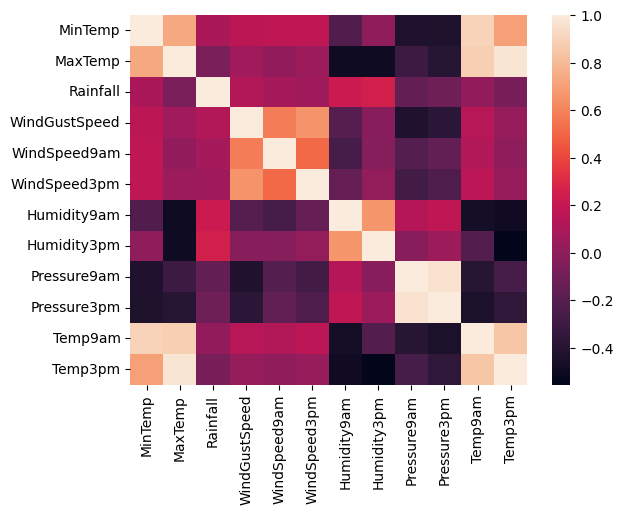

In [17]:
sns.heatmap(data=cor,xticklabels=cor.columns.values,yticklabels=cor.columns.values)

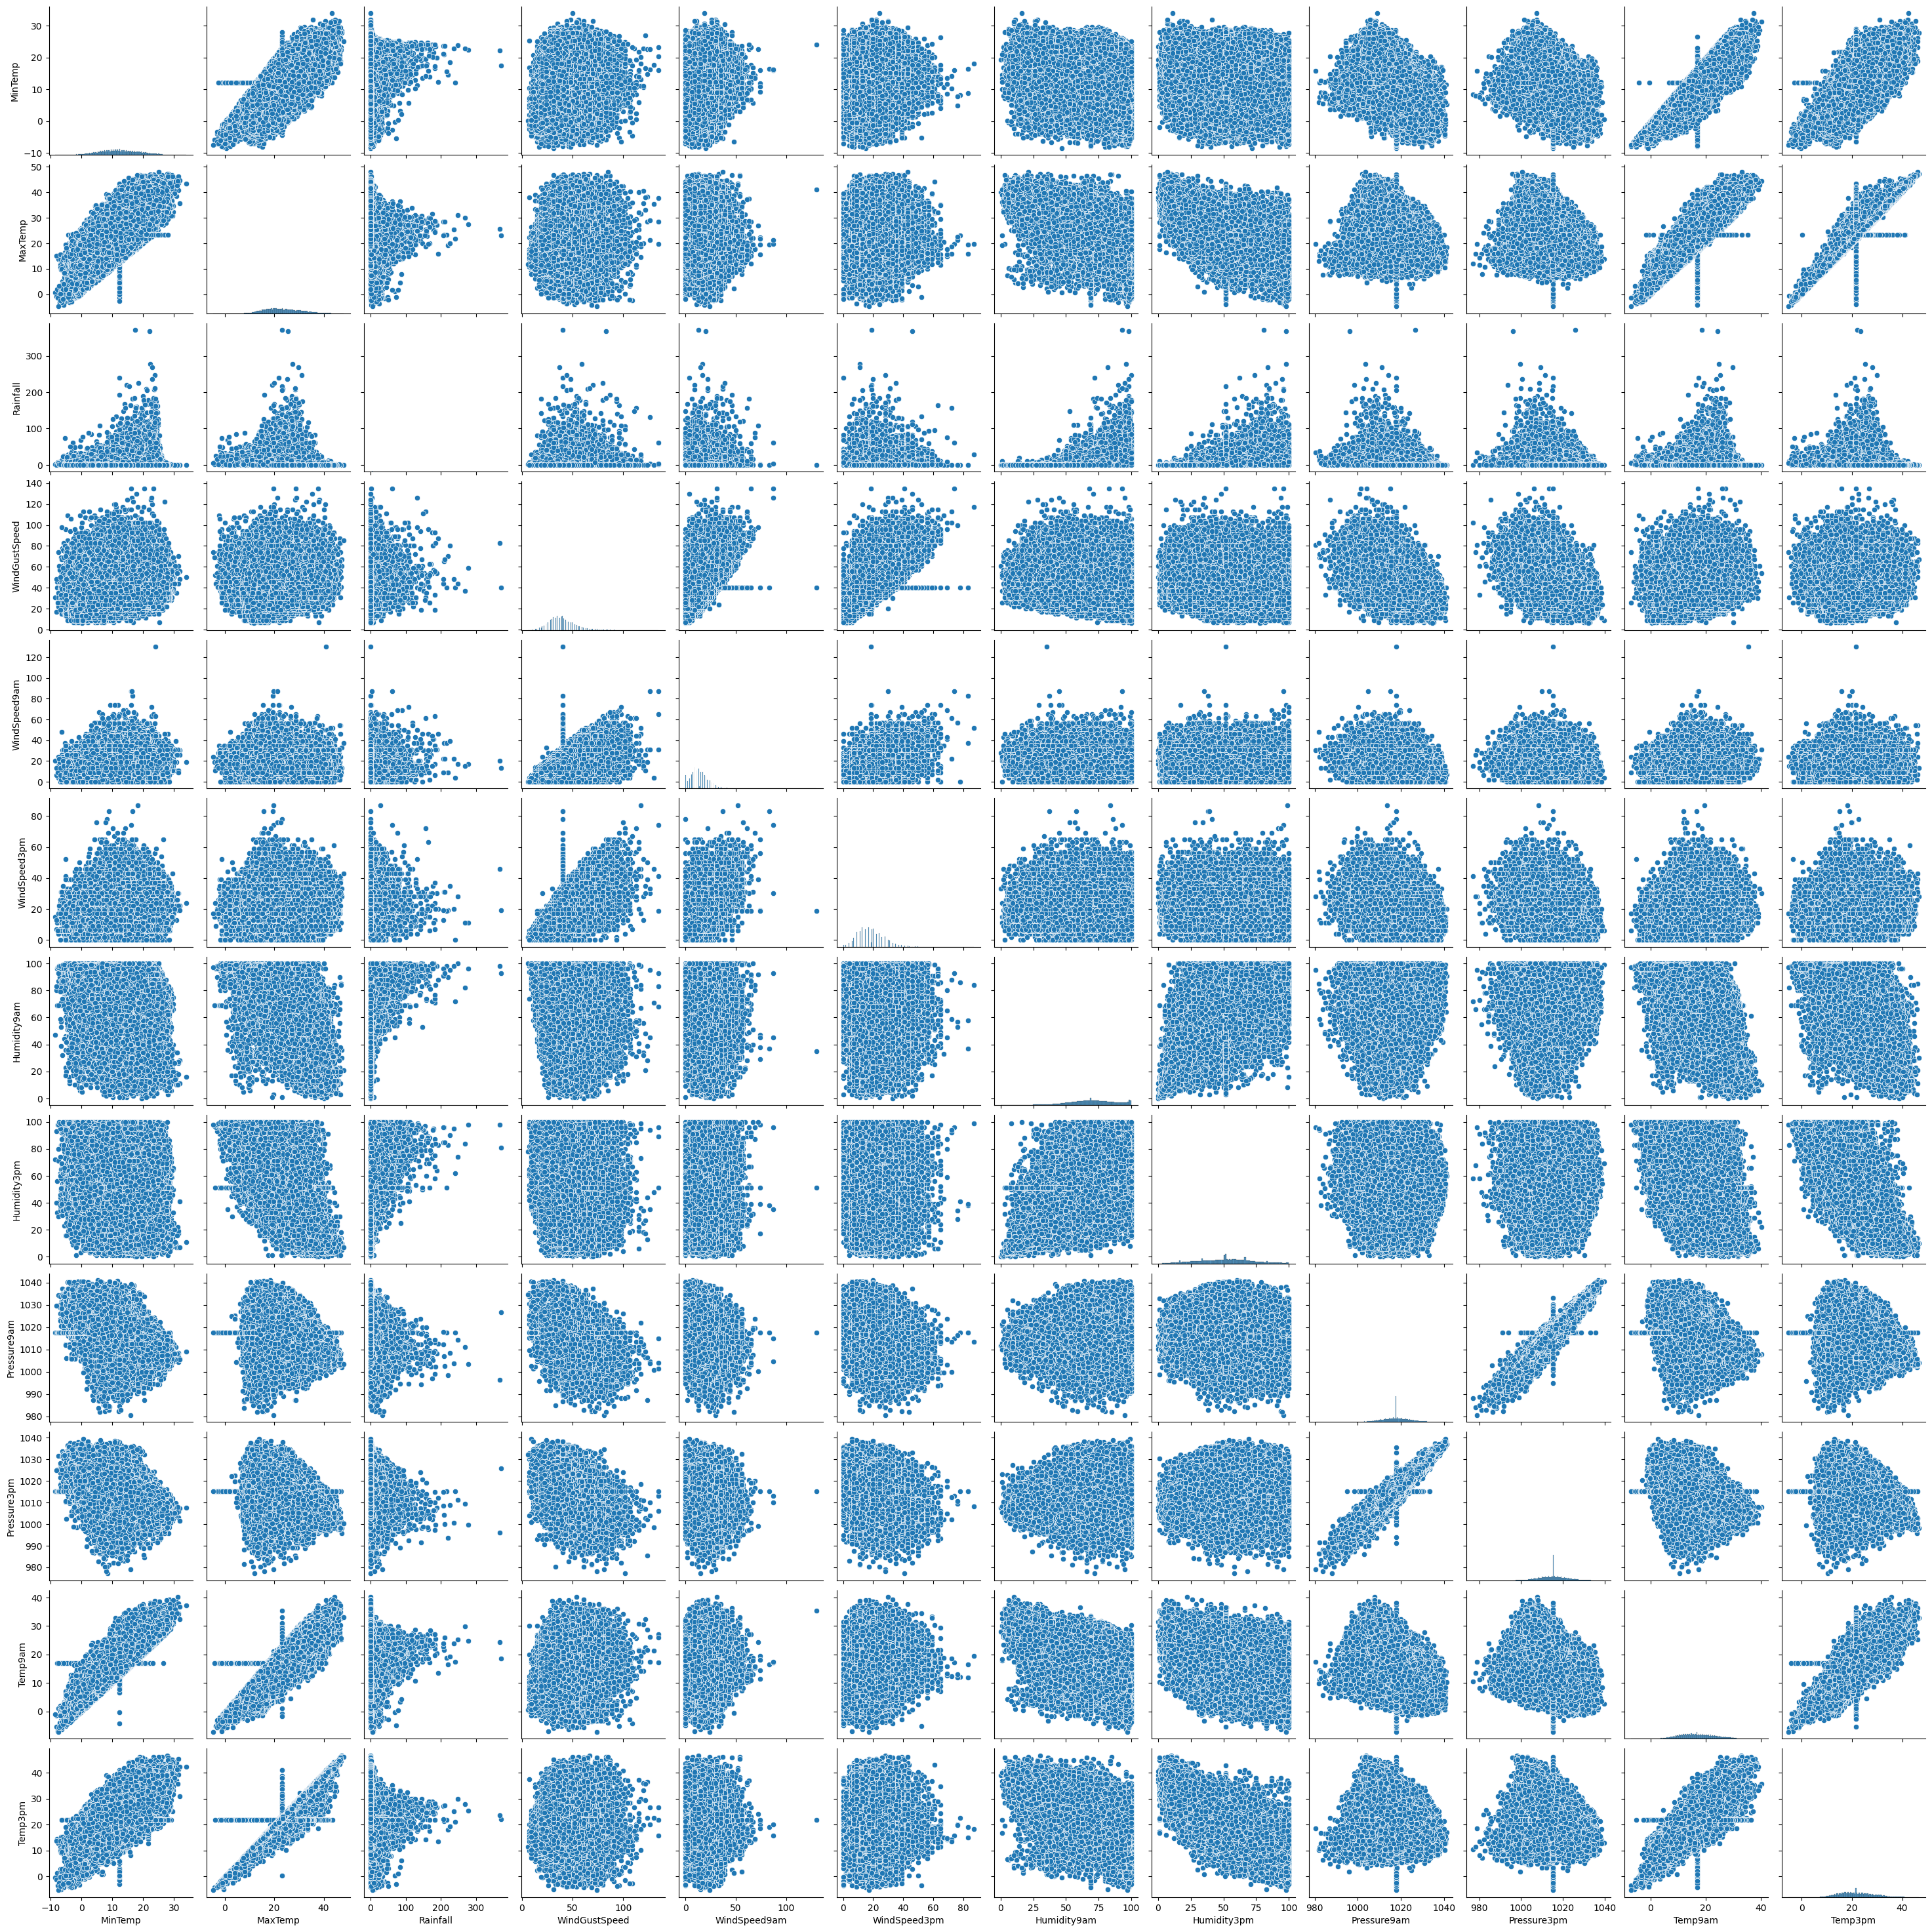

In [18]:
sns.pairplot(data)

<Axes: >

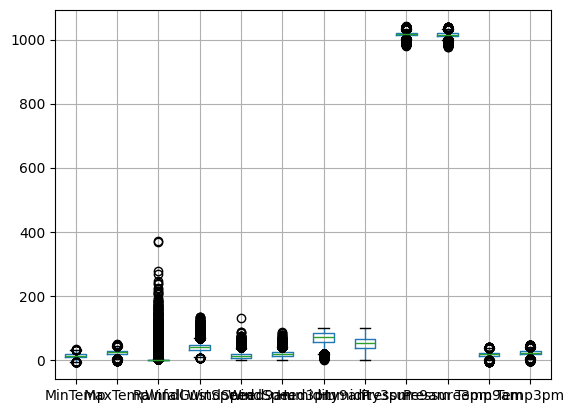

In [19]:
data.boxplot()

In [20]:
data[['year', 'month', 'day']] = data['Date'].str.split('-', expand=True)

In [21]:
del data['Date']

### step-6: Feature Scaling

### standardizing the data

In [22]:
data.head()

Location  MinTemp  MaxTemp  Rainfall  WindGustSpeed  WindSpeed9am  \
0   Albury     13.4     22.9       0.6           44.0          20.0   
1   Albury      7.4     25.1       0.0           44.0           4.0   
2   Albury     12.9     25.7       0.0           46.0          19.0   
3   Albury      9.2     28.0       0.0           24.0          11.0   
4   Albury     17.5     32.3       1.0           41.0           7.0   

   WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  ...  Temp9am  Temp3pm  \
0          24.0         71.0         22.0       1007.7  ...     16.9     21.8   
1          22.0         44.0         25.0       1010.6  ...     17.2     24.3   
2          26.0         38.0         30.0       1007.6  ...     21.0     23.2   
3           9.0         45.0         16.0       1017.6  ...     18.1     26.5   
4          20.0         82.0         33.0       1010.8  ...     17.8     29.7   

   RainTomorrow RainToday WindGustDir WindDir9am WindDir3pm year month   day  
0            No        No           W          W        WNW   01    12  2008  
1            No        No         WNW        NNW        WSW   02    12  2008  
2            No        No         WSW          W        WSW   03    12  2008  
3            No        No          NE         SE          E   04    12  2008  
4            No        No           W        ENE         NW   05    12  2008  

[5 rows x 21 columns]

In [23]:
data.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
RainTomorrow     0
RainToday        0
WindGustDir      0
WindDir9am       0
WindDir3pm       0
year             0
month            0
day              0
dtype: int64

In [24]:
from sklearn.preprocessing import StandardScaler

#splitting x and y values
y = data['RainTomorrow']
x = data.drop('RainTomorrow',axis=1)

In [25]:
names = x.columns #Loading the names of the x_features

In [26]:
names

Index(['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'WindGustSpeed',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm', 'RainToday',
       'WindGustDir', 'WindDir9am', 'WindDir3pm', 'year', 'month', 'day'],
      dtype='object')

In [27]:
len(y)

142193

In [28]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

In [29]:
x['Location'] = le.fit_transform(data['Location'])
x['WindGustDir'] = le.fit_transform(data['WindGustDir'])
x['WindDir9am'] = le.fit_transform(data['WindDir9am'])
x['WindDir3pm'] = le.fit_transform(data['WindDir3pm'])
x['RainToday'] = le.fit_transform(data['RainToday'])

In [30]:
sc = StandardScaler() # initializing the standardscaler
x_scaled = sc.fit_transform(x)

In [31]:
x_scaled_df = pd.DataFrame(x_scaled,columns=names)

In [32]:
le1 = LabelEncoder()
y = le1.fit_transform(data['RainTomorrow'])

### step-7: Splitting the data into Train and Test

In [33]:
print(len(x_scaled_df), len(y))

142193 142193


In [34]:
from sklearn import model_selection
x_train,x_test,y_train,y_test=model_selection.train_test_split(x_scaled,y,test_size=0.2,random_state =0)

# Model Buiding

### step-1: Training and Testing the Model

### Steps in Building the model:-

### initializing all the models and predicting for better acuracy

In [35]:
import xgboost
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB

# Initialize models
XGBoost = xgboost.XGBRFClassifier()
Rand_forest = RandomForestClassifier()
Dtree = DecisionTreeClassifier()
GBM = GradientBoostingClassifier()
log = LogisticRegression()
naive_bayes = GaussianNB()


In [36]:
# Fit the models
XGBoost.fit(x_train, y_train)

XGBRFClassifier(base_score=None, booster=None, callbacks=None,
                colsample_bylevel=None, colsample_bytree=None, device=None,
                early_stopping_rounds=None, enable_categorical=False,
                eval_metric=None, feature_types=None, gamma=None,
                grow_policy=None, importance_type=None,
                interaction_constraints=None, max_bin=None,
                max_cat_threshold=None, max_cat_to_onehot=None,
                max_delta_step=None, max_depth=None, max_leaves=None,
                min_child_weight=None, missing=nan, monotone_constraints=None,
                multi_strategy=None, n_estimators=None, n_jobs=None,
                num_parallel_tree=None, objective='binary:logistic',
                random_state=None, reg_alpha=None, ...)

In [37]:
Rand_forest.fit(x_train, y_train)

RandomForestClassifier()

In [38]:
GBM.fit(x_train, y_train)

GradientBoostingClassifier()

In [39]:
Dtree.fit(x_train, y_train)

DecisionTreeClassifier()

In [40]:
log.fit(x_train, y_train)

LogisticRegression()

In [41]:
naive_bayes.fit(x_train, y_train)

GaussianNB()

In [44]:
#Predicting the train values
p1 = XGBoost.predict(x_train)
p2 = Rand_forest.predict(x_train)
p3 = GBM.predict(x_train)
p4 = Dtree.predict(x_train)
p5 = log.predict(x_train)
p6 = naive_bayes.predict(x_train)

Model Evaluation

1. Accuracy_score

In [45]:
print("xgboost:", metrics.accuracy_score(y_train,p1))

print("Rand_forest:",metrics.accuracy_score(y_train,p2)) 

print("GBM:", metrics.accuracy_score(y_train,p3))

print("Dtree:",metrics.accuracy_score(y_train,p4))

print("log:", metrics.accuracy_score(y_train,p5))

print("naive_bayes:",metrics.accuracy_score(y_train,p6))

xgboost: 0.843557149638694
Rand_forest: 0.9999912091003393
GBM: 0.849069043725935
Dtree: 1.0
log: 0.8386254549290575
naive_bayes: 0.8061606624821984


In [46]:
# Make predictions on the test set
t1 = XGBoost.predict(x_test)
t2 = Rand_forest.predict(x_test)
t3 = GBM.predict(x_test)
t4 = Dtree.predict(x_test)
t5 = log.predict(x_test)
t6 = naive_bayes.predict(x_test)

In [47]:
print("xgboost:", metrics.accuracy_score(y_test,t1))

print("Rand_forest:",metrics.accuracy_score(y_test,t2)) 

print("GBM:", metrics.accuracy_score(y_test,t3))

print("Dtree:",metrics.accuracy_score(y_test,t4))

print("log:", metrics.accuracy_score(y_test,t5))

print("naive_bayes:", metrics.accuracy_score(y_test,t6))

xgboost: 0.8437708780196209
Rand_forest: 0.8567108548120539
GBM: 0.8499947255529379
Dtree: 0.7827279440205351
log: 0.8418017511164246
naive_bayes: 0.8085727346249868


Selecting the model,which gives the best accuracy of all,and generate predictions 

In [48]:
y_pred = Rand_forest.predict(x_test)

2. Confusion Matrix

In [49]:
conf_matrix = metrics.confusion_matrix(y_test,y_pred)

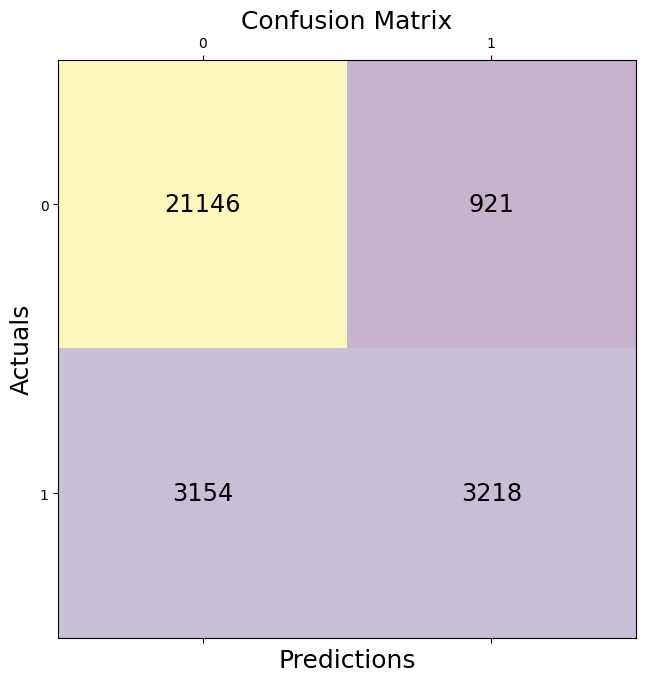

In [50]:
fig, ax = plt.subplots(figsize=(7.5, 7.5)) 
ax.matshow(conf_matrix, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

In [51]:
# Calculate various metrics
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Accuracy = accuracy_score(y_test, y_pred)
Precision = precision_score(y_test, y_pred)
Recall = recall_score(y_test, y_pred)
F1_score = f1_score(y_test, y_pred)

In [52]:
print(conf_matrix)
print("Accuracy:", Accuracy)
print("Precision:", Precision)
print("Recall:", Recall)
print("F1-score:", F1_score)

[[21146   921]
 [ 3154  3218]]
Accuracy: 0.8567108548120539
Precision: 0.777482483691713
Recall: 0.5050219711236661
F1-score: 0.6123109123775095


3. Roc-Auc Curve

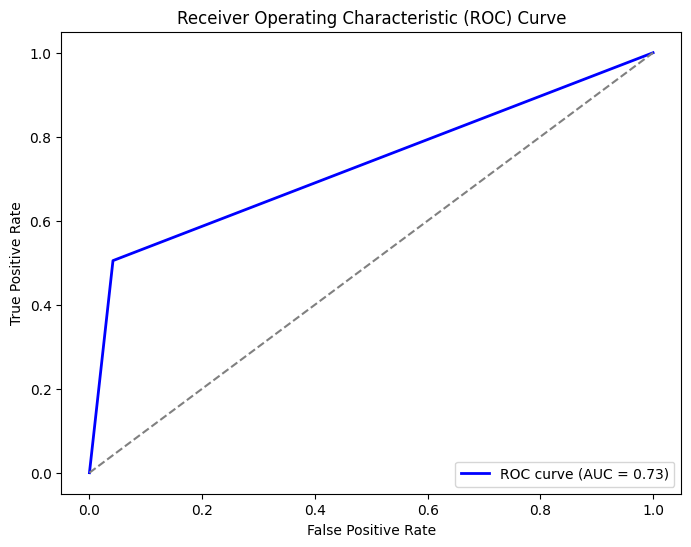

In [53]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
# Calculating the ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

SAVING THE MODEL

In [54]:
# Assuming 'model' is your trained machine learning model

import pickle

# Save the trained model
with open('rainfall.pkl', 'wb') as file:
    pickle.dump(Rand_forest, file)


In [55]:
pickle.dump(Rand_forest,open('rainfall.pkl','wb')) # model

pickle.dump(le,open('encoder.pkl','wb')) # encoder saving

pickle.dump(imp_mode,open('impter.pkl','wb'))# imputer saving 

pickle.dump(sc,open('scale.pkl','wb'))# scaling the data